In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/YAZILIM/6 BSBI/Customer_Churn.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv(path)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

In [ ]:
#Remove rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

In [ ]:
# Drop customerID (not useful for modeling)
df = df.drop('customerID', axis=1)

In [ ]:
# 5. Encode categorical variables
# I use one‑hot encoding for multi‑category variables and binary encoding for Yes/No.
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


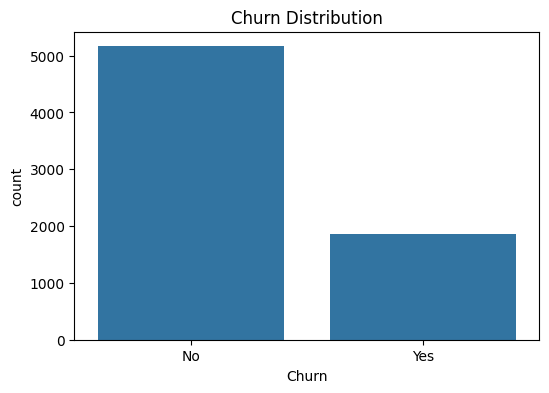

In [ ]:
# 6. Exploratory Data Analysis (EDA)
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

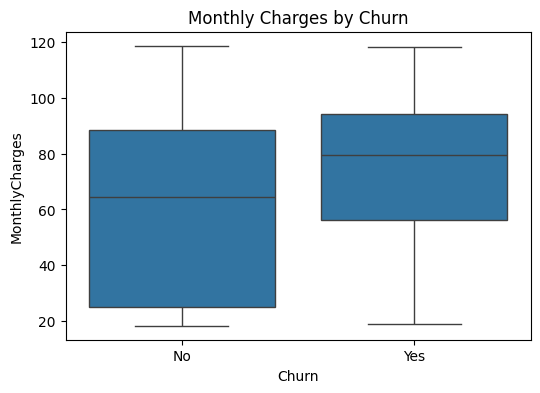

In [ ]:
# Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()


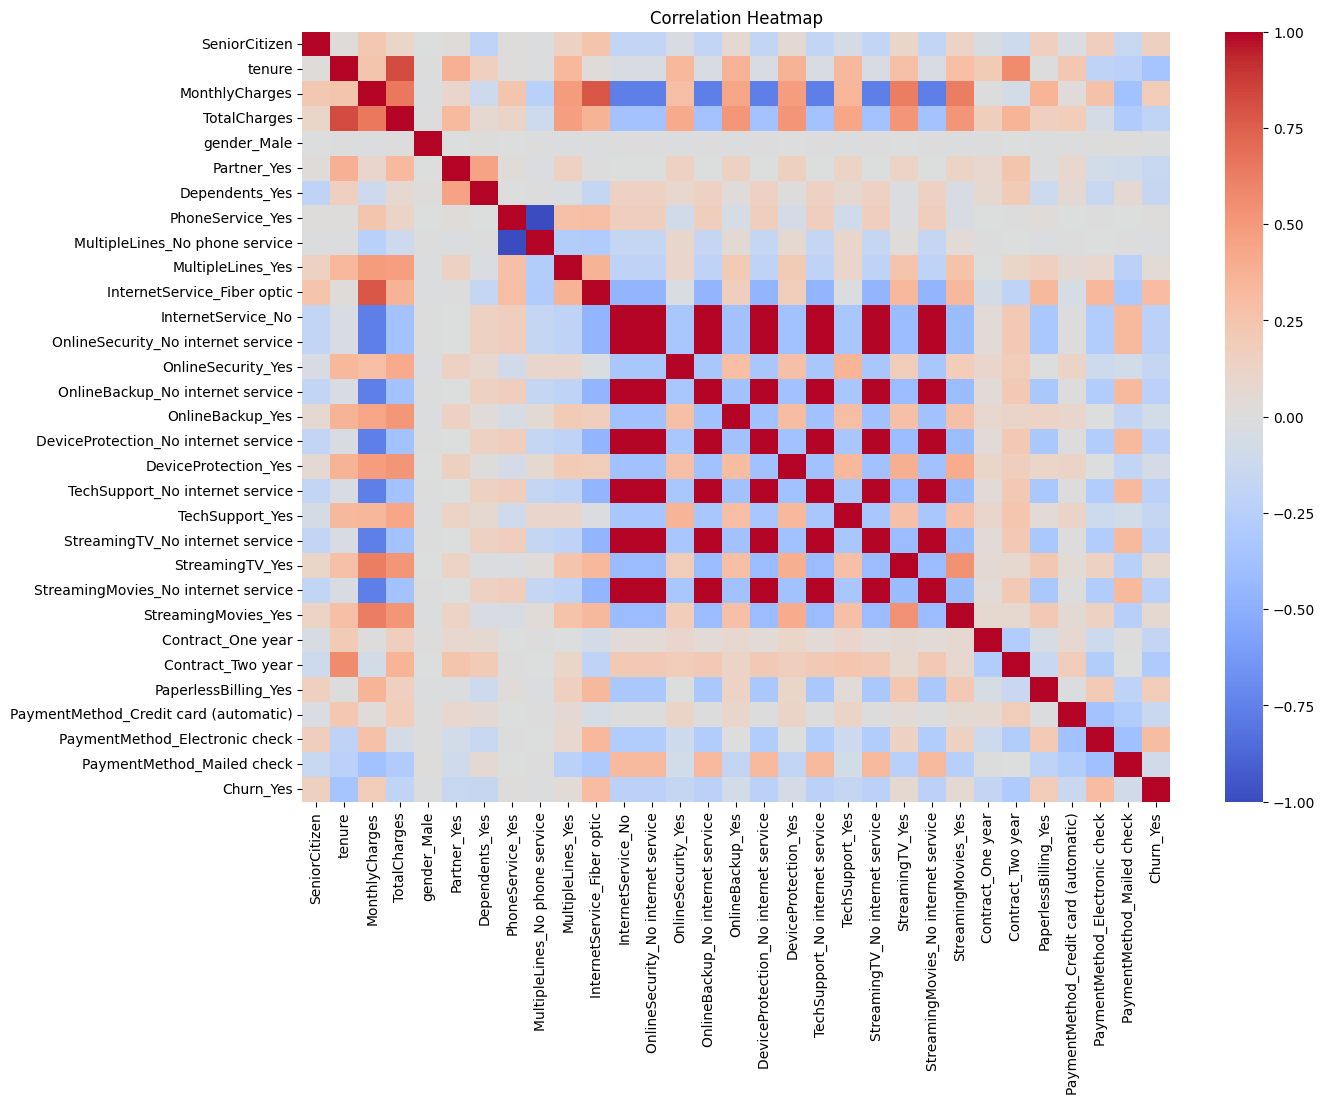

In [ ]:
# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Task 2: Modelling Logistic Regression, Regression Model, K‑Means\

In [ ]:
# Task 2: Modelling Logistic Regression, Regression Model, K‑Means
# Common preparation for all models
# Defining features and target, then create train–test splits and scaling where needed.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score
)


In [ ]:
# 1.1 Define X and y (classification target)
# Target: Churn (Yes/No) → convert to binary 1/0
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Use encoded dataframe for modeling
X = df_encoded.drop(columns=['Churn_Yes'])  # or drop 'Churn_binary' if you encoded it
y = df['Churn_binary']


In [ ]:
# 1.2 Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# 1.3 Feature scaling (for LR & K-Means)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_full = scaler.fit_transform(X)  # for K-Means on full dataset

In [ ]:
# 2. Model 1 — Logistic Regression (classification)
# Initialize logistic regression for classification
log_clf = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit on training data
log_clf.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# 2.2 Evaluate the model
# Predict class labels
y_pred = log_clf.predict(X_test_scaled)

# Predict probabilities (for later comparison / business insight)
y_proba = log_clf.predict_proba(X_test_scaled)[:, 1]

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Classification Accuracy:", acc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Classification Accuracy: 0.8038379530916845
Confusion Matrix:
 [[916 117]
 [159 215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [ ]:
# 3. Model 2 — Regression model based on the same features
# Here I treat churn as a continuous outcome (0–1) and use Linear Regression.
# Conceptually: instead of modeling log‑odds (Logistic Regression), directly model the expected churn score.

In [ ]:
# 3.1 Prepare target for regression
# There is already y as 0/1, so I can reuse it.
y_reg = y

In [ ]:
# 3.2 Train Linear Regression
lin_reg = LinearRegression()

# Fit on scaled features
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predict continuous churn scores
y_reg_pred = lin_reg.predict(X_test_scaled)

# Compute regression metrics for training set
mse_train = mean_squared_error(y_train, lin_reg.predict(X_train_scaled))
r2_train = r2_score(y_train, lin_reg.predict(X_train_scaled))

print("Linear Regression (Churn Score) - Train MSE:", mse_train)
print("Linear Regression (Churn Score) - Train R^2:", r2_train)

# Compute regression metrics for test set
mse_test = mean_squared_error(y_test, y_reg_pred)
r2_test = r2_score(y_test, y_reg_pred)

print("\nLinear Regression (Churn Score) - Test MSE:", mse_test)
print("Linear Regression (Churn Score) - Test R^2:", r2_test)

# Inspect first few predictions
print("\nFirst 10 predicted churn scores (Test Set):", y_reg_pred[:10])

Linear Regression (Churn Score) - Train MSE: 0.1386684557423341
Linear Regression (Churn Score) - Train R^2: 0.2893897159260018

Linear Regression (Churn Score) - Test MSE: 0.14450871408240154
Linear Regression (Churn Score) - Test R^2: 0.2595251582160053

First 10 predicted churn scores (Test Set): [-0.0032123   0.56660022 -0.01807495  0.19608796  0.15876294  0.38812555
  0.02548555  0.1823725   0.65433219  0.01733348]


In [ ]:
# Model 3 — K-Means Clustering (segmentation)
# Here ignored the churn label and let the algorithm discover natural groups in the data.
# Later, it will be analyzed churn rate within each cluster.

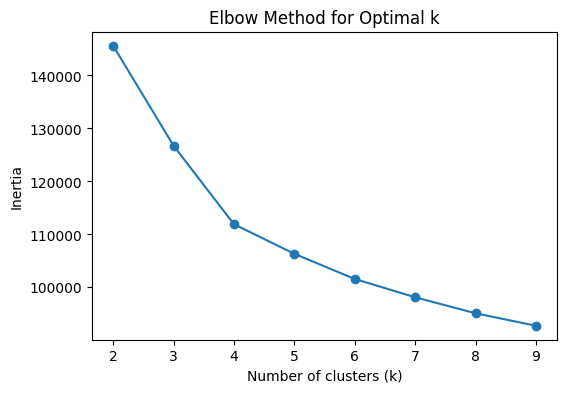

In [ ]:
# 4.1 Choose number of clusters (k) using elbow method
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_full)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# I’ll visually pick a reasonable k 4 where the curve starts to “bend”.

In [ ]:
# 4.2 Fit K-Means with chosen k (example: k=4)
k_opt = 4  # choose based on elbow plot
kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled_full)

# Add cluster labels back to original dataframe
df['Cluster'] = clusters


In [ ]:
# 4.3 Analyze churn rate per cluster
cluster_churn = df.groupby('Cluster')['Churn_binary'].mean()
cluster_size = df['Cluster'].value_counts().sort_index()

print("Cluster sizes:\n", cluster_size)
print("\nChurn rate per cluster:\n", cluster_churn)


Cluster sizes:
 Cluster
0    1520
1     680
2    2733
3    2099
Name: count, dtype: int64

Churn rate per cluster:
 Cluster
0    0.074342
1    0.250000
2    0.466886
3    0.147689
Name: Churn_binary, dtype: float64


In [ ]:
# it is  also possible to inspect feature averages per cluster:
cluster_profile = df.groupby('Cluster')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()
print("\nCluster profiles (tenure, charges):\n", cluster_profile)



Cluster profiles (tenure, charges):
             tenure  MonthlyCharges  TotalCharges
Cluster                                         
0        30.667763       21.076283    665.220329
1        31.830882       41.992500   1500.433750
2        15.538968       73.965368   1171.147384
3        55.865650       91.911768   5156.737994


In [ ]:
# 4.4 Interpretation
# What it does: Groups customers into segments based on similarity in all features.

# Output: Cluster labels (0,1,2,3,…) and their profiles.

# Use in BI: Helps identify high‑risk segments (e.g., short tenure,
# high monthly charges, month‑to‑month contracts) and tailor strategies per segment.